In [25]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [26]:
import numpy as np
import pandas as pd

In [27]:
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [29]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Precipitation Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector.get_table_names()
columns = inspector.get_columns('measurement')  

# Select only the date and prcp values.
session.query(Measurement.date, Measurement.prcp).all()



[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [35]:
# Calculate the date 1 year ago from the last data point in the database
# Query to find the last data point in the database 
last_date = session.query(func.max(Measurement.date)).scalar()

# The date 1 year ago from the last data point in the database
date_one_yr_ago_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')

In [36]:
# Perform a query to retrieve the date and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()
last_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year)
last_year_df = last_year_df.set_index("date")
last_year_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [38]:
# Sort the dataframe by date
sorted_df = last_year_df.sort_values(by = "date")
sorted_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


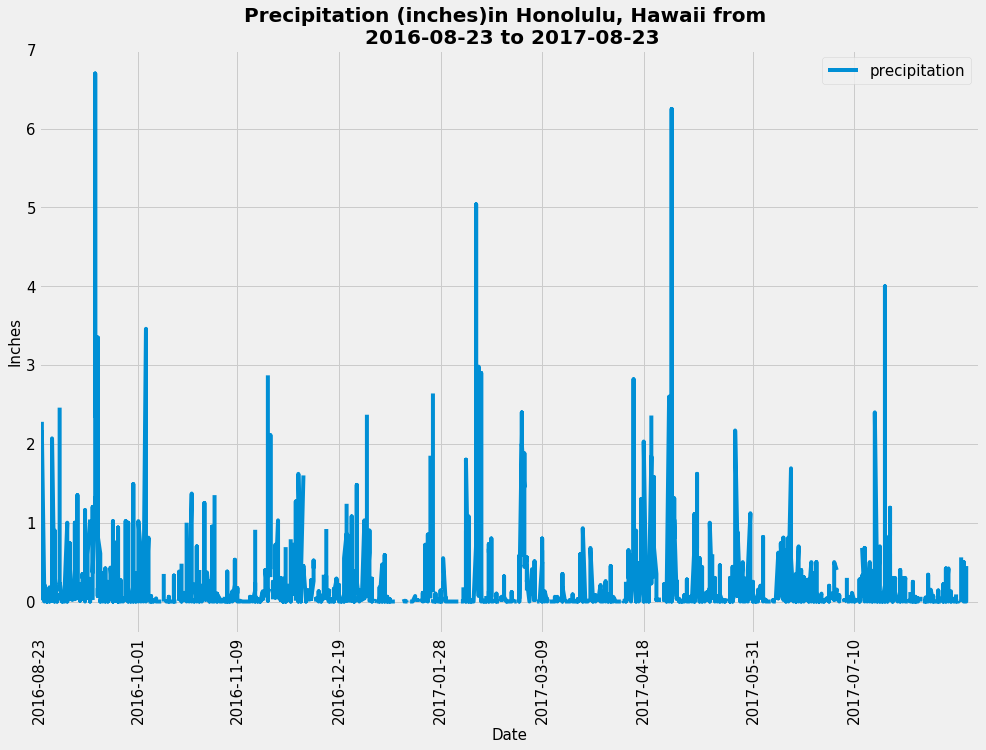

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

# Set plot and plot the chart
plt.figure(figsize=(15, 10))
plt.plot(sorted_df.index, sorted_df['prcp'])

# Add legned 
plt.legend(['precipitation'], loc="upper right",fontsize=15)
# set x location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

# Assign xticks
plt.xticks(xloc, rotation='vertical',fontsize=15)
# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title(f"Precipitation (inches)in Honolulu, Hawaii from \n {query_date} to {last_date}",fontsize=20, fontweight = 'bold')
plt.yticks(size=15)

# Asign xlim and ylim
plt.xlim(0,370)
plt.ylim(-0.4,7)


# Save Figure
plt.savefig("Images/Precipitation_Plot.png", bbox_inches = 'tight')
# Show plot
plt.show()


In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Stations Analysis

In [41]:
# Design a query to show how many stations are available in this dataset?
#Inspect the station table 
columns = inspector.get_columns('station')
session.query(Station.id).count()

9

In [42]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ste = [Station.station, func.count(Measurement.station)]
session.query(*ste).filter(Station.station == Measurement.station).group_by(Station.station).\
                            order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == ste[0]).all()

[(53.0, 87.0, 73.09795396419437)]

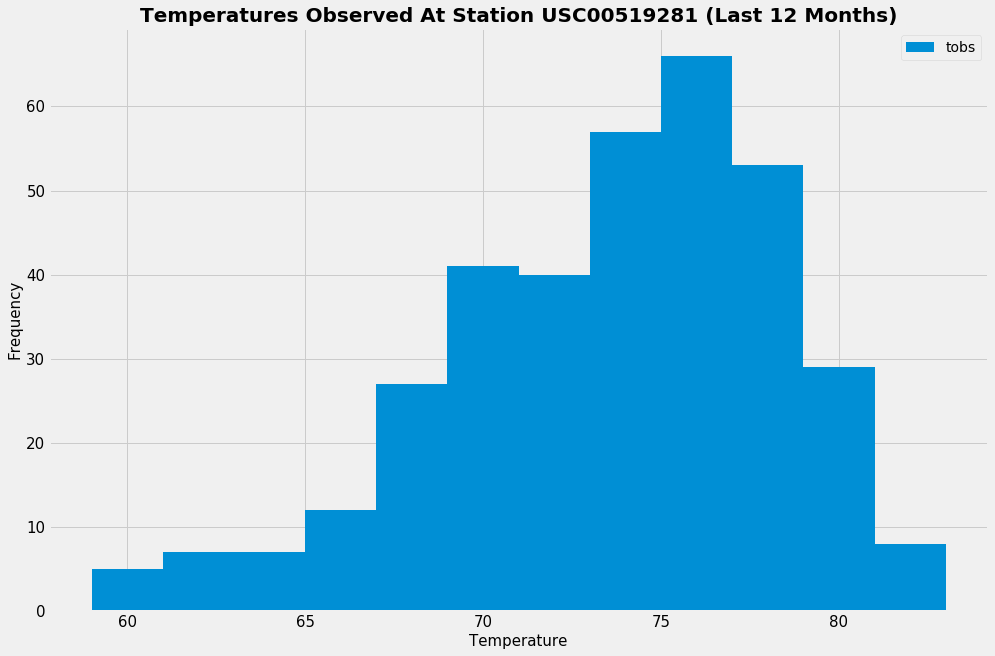

<Figure size 432x288 with 0 Axes>

In [44]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.tobs).desc()).first() # 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
            filter(Measurement.date.between(query_date,last_date),\
                   Measurement.station == 'USC00519281').all()

# Plot the results as a histogram
plt.figure(figsize=(15,10))
plt.hist(np.ravel(results), bins=12)
plt.title('Temperatures Observed At Station USC00519281 (Last 12 Months)',fontsize=20, fontweight = 'bold')
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=15)
plt.xticks(size=15)

# Save Figure
plt.savefig("Images/station_Plot.png")
# Show plot
plt.show()
plt.tight_layout()



## Step 2 - Climate App 
For this part the solution is provided in python "app.py" file in the main folder.

## Bonus Challenge Assignment

### Temperature Analysis I

In [45]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
avg_june_temp_tuple_list = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "06").all()

average_june_temp = list(np.ravel(avg_june_temp_tuple_list))[0]

# Identify the average temperature in December at all stations across all available years in the dataset. 
avg_dec_temp_tuple_list = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "12").all()

average_dec_temp = list(np.ravel(avg_dec_temp_tuple_list))[0]

print(f"The average temperature in June at all stations across all available years in the dataset is {average_june_temp} F.")
print(f"The average temperature in December at all stations across all available years in the dataset is {average_dec_temp} F.")

The average temperature in June at all stations across all available years in the dataset is 74.94411764705882 F.
The average temperature in December at all stations across all available years in the dataset is 71.04152933421226 F.


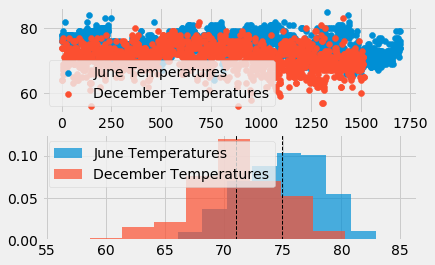

In [46]:
june_temp_tuple_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "06").all()

june_temp_list = list(np.ravel(june_temp_tuple_list))

# Remove nulls (if any)
clean_june_temp_list = []
for temp in june_temp_list: 
    if temp != None : 
        clean_june_temp_list.append(temp)

dec_temp_tuple_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "12").all()

dec_temp_list = list(np.ravel(dec_temp_tuple_list))

# Remove nulls (if any)
clean_dec_temp_list = []
for temp in dec_temp_list: 
    if temp != None : 
        clean_dec_temp_list.append(temp)
    
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(clean_june_temp_list)), clean_june_temp_list, label="June Temperatures")
plt.scatter(range(len(clean_dec_temp_list)), clean_dec_temp_list, label="December Temperatures")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(clean_june_temp_list, 10, density=True, alpha=0.7, label="June Temperatures")
plt.hist(clean_dec_temp_list, 10, density=True, alpha=0.7, label="December Temperatures")
plt.axvline(np.mean(clean_june_temp_list), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(clean_dec_temp_list), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.savefig('./Images/june_dec_scatterplot_histogram.png')

## Unpaired t-tests

- I used Unpaired t-tests to compare the means of two populations (June temperatures in Hawaii and December temperatures in Hawaii). Why I used Unpaired t-tests because it used to compare the means of two independent populations. However, a paired t-test (one sample t-test) looks at comparing the sample to the population, which we don't want in this case.

In [47]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
stats.ttest_ind(june_temp_list, dec_temp_list, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

### Temperature Analysis II

In [122]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [123]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
yearly_temp = calc_temps('2016-08-23', '2017-08-23')
yearly_temp

[(58.0, 74.59058295964125, 87.0)]

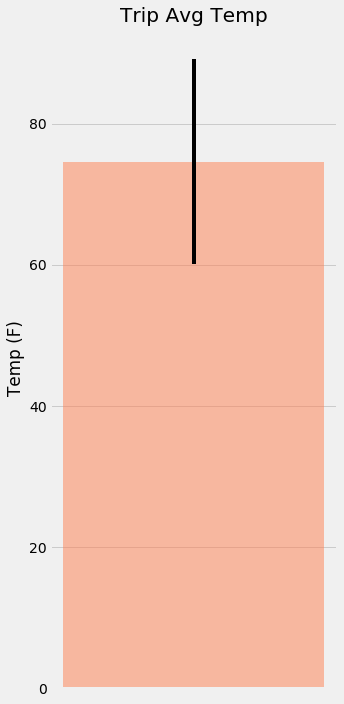

In [124]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmax = yearly_temp[0][2]
tmin = yearly_temp[0][0]
peak_to_peak = tmax - tmin # This will be our error line
tavg = yearly_temp[0][1] # This will be the height of our graph 

# Plot
fig, ax = plt.subplots(figsize = (5, 10)) # Create figure & axis objects 
ax.bar(x = 1, height = tavg, yerr = peak_to_peak/2, width = 0.4,color = 'coral', alpha = 0.5) # Plotting
ax.set_xticks([0]) 
plt.yticks(size=14)

# "Labels"
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.savefig("Images/Trip_Avg_Temp.png", bbox_inches = 'tight')
plt.tight_layout()
plt.show()

### Daily Rainfall Average

In [125]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
results = session.query(Measurement.station, Station.name, Station.latitude,\
              Station.longitude, Station.elevation, func.avg(Measurement.prcp)).\
        filter(Measurement.station == Station.station,\
               Measurement.date.between(query_date, last_date)).\
        group_by(Measurement.station).\
        order_by(Measurement.prcp.desc()).\
        all()

print(results)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.19894886363636372), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.45064024390243923), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14142857142857151), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12543396226415093), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.12105095541401273), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.044818941504178235), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0765)]


In [126]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [127]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2018, 1, 7)

# Use the start and end date to create a range of dates
datelist = pd.date_range(start_date, periods=7).tolist()

# Stip off the year and save a list of %m-%d strings
dates = []
for date in datelist:
    dates.append(dt.datetime.strftime(date, '%m-%d'))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in dates:
    normals.append(daily_normals(date))

print("Chosen Dates: Aug 23 to Aug 29 (7 day trip)")
for normal in normals:
    print(normal)


Chosen Dates: Aug 23 to Aug 29 (7 day trip)
[(62.0, 69.15384615384616, 77.0)]
[(60.0, 69.39622641509433, 77.0)]
[(62.0, 68.9090909090909, 77.0)]
[(58.0, 70.0, 76.0)]
[(56.0, 67.96428571428571, 76.0)]
[(61.0, 68.96491228070175, 76.0)]
[(57.0, 68.54385964912281, 76.0)]


In [128]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_list = []
for normal in normals:
    normal_list.append(np.ravel(normal))
trip_normals_df = pd.DataFrame(normal_list, columns = ['tmin', 'tavg', 'tmax'])
trip_normals_df.index = [str(date.strftime('%Y-%m-%d')) for date in datelist]
trip_normals_df

,tmin,tavg,tmax
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


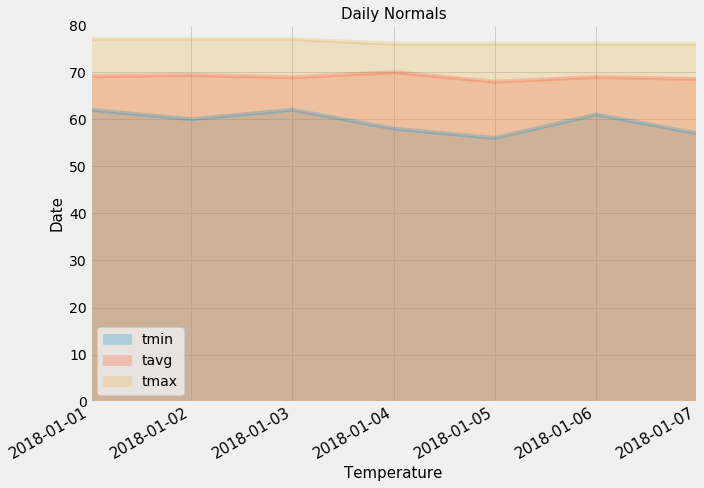

In [129]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize=(10,7))
trip_normals_df.plot(kind='area', stacked=False, alpha=0.25, ax=ax)
plt.title("Daily Normals",fontsize=15)
plt.ylabel("Date",fontsize=15)
plt.xlabel("Temperature",fontsize=15)

plt.ylim(0,80)
plt.xlim(0,4)
plt.yticks(size=14)
plt.xticks(np.arange(7), trip_normals_df.index,fontsize=15)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )

plt.savefig("Images/daily_normals.png", bbox_inches = 'tight')
plt.tight_layout()
plt.show()